# FRAUD--CC DETECTION

##### Presented by Edison Wang 

In [2]:
#Step one: install packages to import files 

In [4]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\Edison'

In [18]:
#import the file:
df = pd.read_excel('CC-3Y-Transactions.xlsx')

In [355]:
df.head(10)

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,F,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574
5,"Delhi, India",2014-09-08,Silver,Bills,F,100036
6,"Delhi, India",2015-02-24,Gold,Bills,F,143250
7,"Greater Mumbai, India",2014-06-26,Platinum,Bills,F,150980
8,"Delhi, India",2014-03-28,Silver,Bills,F,192247
9,"Delhi, India",2014-09-01,Platinum,Bills,F,67932


In [21]:
#Lets check how many records do we have:
df.shape

(26052, 6)

In [22]:
type(df)

pandas.core.frame.DataFrame

In [24]:
#Check the datatypes in our dataframe: 
#All Dtype are correct, and there are no Null values.
#We can proceed to creating the reports.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.2+ MB


In [356]:
# Since all cities are from india, we can keep only the city names: 
df1 = df.replace(', India', '', regex = True)
df1

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,2014-10-29,Gold,Bills,F,82475
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555
2,Bengaluru,2014-08-27,Silver,Bills,F,101738
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424
4,Bengaluru,2015-05-05,Gold,Bills,F,171574
5,Delhi,2014-09-08,Silver,Bills,F,100036
6,Delhi,2015-02-24,Gold,Bills,F,143250
7,Greater Mumbai,2014-06-26,Platinum,Bills,F,150980
8,Delhi,2014-03-28,Silver,Bills,F,192247
9,Delhi,2014-09-01,Platinum,Bills,F,67932


## Report 1: Top5 Cities - Expences

In [62]:
# We first take a look at total number of cities in df1: 

In [77]:
cities = df1.City
cities.drop_duplicates(inplace = True)
cities
citydf = pd.DataFrame(cities); citydf

,City
0,Delhi
1,Greater Mumbai
2,Bengaluru
23,Ahmedabad
13996,Markapur
...,...
18953,Changanassery
19089,Tirur
19362,Srikalahasti
19456,Wanaparthy


In [ ]:
# We want to see the top5 cities with the most CC spendings.

#### >>Step1: Summary for 2013.

In [261]:
# 1. Filter data for year 2013: 
from datetime import datetime, timedelta
filter1 = ((df1['Date'] >= datetime(2013, 1, 1)) & (df1['Date'] <= datetime(2013, 12, 31)))
df1[filter1]

,City,Date,Card Type,Exp Type,Gender,Amount
11,Greater Mumbai,2013-12-07,Signature,Bills,F,278036
19,Greater Mumbai,2013-11-09,Platinum,Bills,F,735566
23,Ahmedabad,2013-10-11,Gold,Bills,F,668568
32,Ahmedabad,2013-11-24,Platinum,Bills,F,227702
40,Delhi,2013-10-27,Platinum,Bills,F,678842
...,...,...,...,...,...,...
26028,Lucknow,2013-11-20,Silver,Travel,F,263420
26040,Hyderabad,2013-10-26,Gold,Travel,F,163352
26041,Chennai,2013-12-08,Signature,Travel,M,207941
26046,Hyderabad,2013-10-09,Signature,Travel,M,198903


In [163]:
# Group by city, sort Amount in DESC
sum2013 = df1.groupby(by = ['City']).sum().sort_values(by=['Amount'], ascending = False).head(5).transpose()
sum2013['Year'] = 2013
sum2013

City,Greater Mumbai,Bengaluru,Ahmedabad,Delhi,Kolkata,Year
Amount,576751476,572326739,567794310,556929212,115466943,2013


#### >>Step2: Summary for 2014.

In [127]:
# 2. Filter data for year 2014: 
filter2 = ((df1['Date'] >= datetime(2014, 1, 1)) & (df1['Date'] <= datetime(2014, 12, 31)))
df2 = df1[filter2]
df2

,City,Date,Card Type,Exp Type,Gender,Amount
0,Delhi,2014-10-29,Gold,Bills,F,82475
1,Greater Mumbai,2014-08-22,Platinum,Bills,F,32555
2,Bengaluru,2014-08-27,Silver,Bills,F,101738
3,Greater Mumbai,2014-04-12,Signature,Bills,F,123424
5,Delhi,2014-09-08,Silver,Bills,F,100036
...,...,...,...,...,...,...
26044,Kolkata,2014-10-14,Gold,Travel,M,243249
26045,Kolkata,2014-02-26,Signature,Travel,F,170049
26047,Kolkata,2014-06-22,Silver,Travel,F,128191
26048,Pune,2014-08-03,Signature,Travel,M,246316


In [128]:
# Group by city, sort Amount in DESC
sum2014 = df2.groupby(by = ['City']).sum().sort_values(by=['Amount'], ascending = False).head(5).transpose()
sum2014['Year'] = 2014
sum2014

City,Bengaluru,Greater Mumbai,Ahmedabad,Delhi,Hyderabad,Year
Amount,351482095,349709415,348289187,329591186,71066005,2014


#### >>Step3: Summary for 2015.

In [131]:
# 3. Filter data for year 2015: 
filter3 = ((df1['Date'] >= datetime(2015, 1, 1)) & (df1['Date'] <= datetime(2015, 12, 31)))
df3 = df1[filter3]
df3

,City,Date,Card Type,Exp Type,Gender,Amount
4,Bengaluru,2015-05-05,Gold,Bills,F,171574
6,Delhi,2015-02-24,Gold,Bills,F,143250
17,Greater Mumbai,2015-03-30,Gold,Bills,F,986379
22,Greater Mumbai,2015-03-27,Silver,Bills,F,467014
28,Bengaluru,2015-01-18,Platinum,Bills,F,987935
...,...,...,...,...,...,...
26032,Kanpur,2015-02-04,Platinum,Travel,F,20961
26038,Surat,2015-05-19,Gold,Travel,M,269464
26042,Hyderabad,2015-01-15,Silver,Travel,M,194550
26043,Hyderabad,2015-05-15,Silver,Travel,F,280335


In [132]:
# Group by city, sort Amount in DESC
sum2015 = df3.groupby(by = ['City']).sum().sort_values(by=['Amount'], ascending = False).head(5).transpose()
sum2015['Year'] = 2015
sum2015

City,Delhi,Greater Mumbai,Ahmedabad,Bengaluru,Kolkata,Year
Amount,145211065,142306409,136213286,135845357,30918731,2015


#### Create Report1 with 3 years: 

In [156]:
result1 = [sum2013, sum2014, sum2015]
print('Report-1: Top 5 Cities-Expenses')
for p in result1:
    display(p) 


Report-1: Top 5 Cities-Expenses


City,Greater Mumbai,Bengaluru,Ahmedabad,Delhi,Kolkata,Year
Amount,576751476,572326739,567794310,556929212,115466943,2013


City,Bengaluru,Greater Mumbai,Ahmedabad,Delhi,Hyderabad,Year
Amount,351482095,349709415,348289187,329591186,71066005,2014


City,Delhi,Greater Mumbai,Ahmedabad,Bengaluru,Kolkata,Year
Amount,145211065,142306409,136213286,135845357,30918731,2015


### Report1 Chart: 

In [296]:
#Add a graph for report1:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 5 artists>

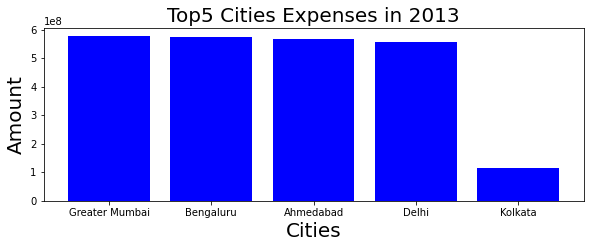

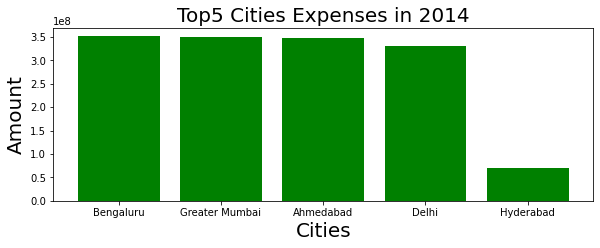

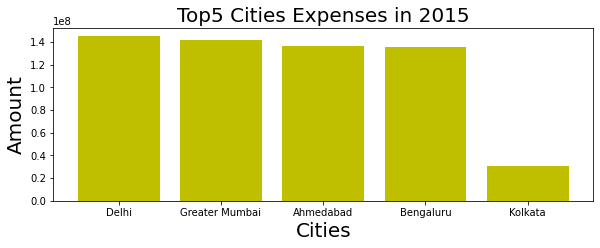

In [466]:
# Bar chart for 2013
fig  = plt.figure(figsize=(15,8))
axis = fig.add_axes([0, 0, 0.5, 0.3])
# Add Title and Labels: 
axis.set_title('Top5 Cities Expenses in 2013', fontsize=20)
axis.set_ylabel('Amount', fontsize=20)
axis.set_xlabel('Cities', fontsize=20)
# Plot a Bar chart: 
Amount13 = df1.groupby(by = ['City']).sum().sort_values(by=['Amount'], ascending = False).head(5)
city13 = ['Greater Mumbai', 'Bengaluru', 'Ahmedabad', 'Delhi', 'Kolkata']
axis.bar(city13, Amount13['Amount'], color = 'b')

# Bar chart for 2014
fig  = plt.figure(figsize=(15,8))
axis = fig.add_axes([0, 0, 0.5, 0.3])
# Add Title and Labels: 
axis.set_title('Top5 Cities Expenses in 2014', fontsize=20)
axis.set_ylabel('Amount', fontsize=20)
axis.set_xlabel('Cities', fontsize=20)
# Plot a Bar chart: 
Amount14 = df2.groupby(by = ['City']).sum().sort_values(by=['Amount'], ascending = False).head(5)
city14 = ['Bengaluru','Greater Mumbai', 'Ahmedabad', 'Delhi', 'Hyderabad']
axis.bar(city14, Amount14['Amount'], color = 'g')

# Bar chart for 2015
fig  = plt.figure(figsize=(15,8))
axis = fig.add_axes([0, 0, 0.5, 0.3])
# Add Title and Labels: 
axis.set_title('Top5 Cities Expenses in 2015', fontsize=20)
axis.set_ylabel('Amount', fontsize=20)
axis.set_xlabel('Cities', fontsize=20)
# Plot a Bar chart: 
Amount15 = df3.groupby(by = ['City']).sum().sort_values(by=['Amount'], ascending = False).head(5)
city15 = ['Delhi', 'Greater Mumbai', 'Ahmedabad', 'Bengaluru', 'Kolkata']
axis.bar(city15, Amount15['Amount'], color = 'y')

## Report 2: Gender-Expenses-Analysis 

#### >>Step1: Summary for 2013.

In [475]:
#Create 4 filters that represent 4 quarters in 2013: 
quarter1 = ((df1['Date'] >= datetime(2013, 1, 1)) & (df1['Date'] <= datetime(2013, 3, 31)))
dfq1 = df1[quarter1]
dfq1 

quarter2 = ((df1['Date'] >= datetime(2013, 4, 1)) & (df1['Date'] <= datetime(2013, 6, 30)))
dfq2 = df1[quarter2]
dfq2 

quarter3 = ((df1['Date'] >= datetime(2013, 7, 1)) & (df1['Date'] <= datetime(2013, 9, 30)))
dfq3 = df1[quarter3]
dfq3 

quarter4 = ((df1['Date'] >= datetime(2013, 10, 1)) & (df1['Date'] <= datetime(2013, 12, 31)))
dfq4 = df1[quarter4]
dfq4 

,City,Date,Card Type,Exp Type,Gender,Amount
11,Greater Mumbai,2013-12-07,Signature,Bills,F,278036
19,Greater Mumbai,2013-11-09,Platinum,Bills,F,735566
23,Ahmedabad,2013-10-11,Gold,Bills,F,668568
32,Ahmedabad,2013-11-24,Platinum,Bills,F,227702
40,Delhi,2013-10-27,Platinum,Bills,F,678842
46,Ahmedabad,2013-12-10,Gold,Bills,F,892016
47,Ahmedabad,2013-11-04,Platinum,Bills,F,313626
50,Delhi,2013-10-04,Signature,Bills,F,735037
52,Ahmedabad,2013-12-21,Signature,Bills,F,402300
53,Delhi,2013-12-07,Signature,Bills,F,733125


In [183]:
# => In 2013, Quarter 1 , 2 , 3 'Amount' are Null. 

In [476]:
# Gender spending in 4 quarters for 2013: 
gen1 = dfq1.groupby(by = ['Gender']).sum()
gen1

gen2 = dfq2.groupby(by = ['Gender']).sum()
gen2

gen3 = dfq3.groupby(by = ['Gender']).sum()
gen3

gen4 = dfq4.groupby(by = ['Gender']).sum()
gen4

,Amount
Gender,
F,333421908
M,280221976


In [255]:
#Generate Gender Spending report for 2013: 
g_report13 = pd.concat([gen1, gen2, gen3, gen4], axis = 1, join = 'outer')
g_report13['Year'] = 2013
g_report13.columns = ['Quarter-1', 'Quarter-2', 'Quarter-3', 'Quarter-4', 'Year']
g_report13


,Quarter-1,Quarter-2,Quarter-3,Quarter-4,Year
Gender,,,,,
F,NaN,NaN,NaN,333421908,2013
M,NaN,NaN,NaN,280221976,2013


#### >>Step2: Summary for 2014.

In [486]:
#Create 4 filters that represent 4 quarters in 2014: 
q1_14 = ((df1['Date'] >= datetime(2014, 1, 1)) & (df1['Date'] <= datetime(2014, 3, 31)))
q1_14 = df1[q1_14]

q2_14 = ((df1['Date'] >= datetime(2014, 4, 1)) & (df1['Date'] <= datetime(2014, 6, 30)))
q2_14 = df1[q2_14]
 
q3_14 = ((df1['Date'] >= datetime(2014, 7, 1)) & (df1['Date'] <= datetime(2014, 9, 30)))
q3_14 = df1[q3_14]

q4_14 = ((df1['Date'] >= datetime(2014, 10, 1)) & (df1['Date'] <= datetime(2014, 12, 31)))
q4_14 = df1[q4_14]

In [487]:
# Gender spending in 4 quarters: 
g1_14 = q1_14.groupby(by = ['Gender']).sum()

g2_14 = q2_14.groupby(by = ['Gender']).sum()

g3_14 = q3_14.groupby(by = ['Gender']).sum()

g4_14 = q4_14.groupby(by = ['Gender']).sum()

In [251]:
#Generate Gender Spending report for 2014: 
g_report14 = pd.concat([g1_14, g2_14, g3_14, g4_14], axis = 1, join = 'outer')
g_report14['Year'] = 2014
g_report14.columns = ['Quarter-1', 'Quarter-2', 'Quarter-3', 'Quarter-4', 'Year']
g_report14

,Quarter-1,Quarter-2,Quarter-3,Quarter-4,Year
Gender,,,,,
F,318768288,331421060,335382914,334689993,2014
M,281336181,269947023,290613061,292555513,2014


#### >>Step3: Summary for 2015.

In [252]:
#Create 4 filters that represent 4 quarters in 2015: 
q1_15 = ((df1['Date'] >= datetime(2015, 1, 1)) & (df1['Date'] <= datetime(2015, 3, 31)))
q1_15 = df1[q1_15]

q2_15 = ((df1['Date'] >= datetime(2015, 4, 1)) & (df1['Date'] <= datetime(2015, 6, 30)))
q2_15 = df1[q2_15]
 
q3_15 = ((df1['Date'] >= datetime(2015, 7, 1)) & (df1['Date'] <= datetime(2015, 9, 30)))
q3_15 = df1[q3_15]

q4_15 = ((df1['Date'] >= datetime(2015, 10, 1)) & (df1['Date'] <= datetime(2015, 12, 31)))
q4_15 = df1[q4_15]

In [253]:
# Gender spending in 4 quarters: 
g1_15 = q1_15.groupby(by = ['Gender']).sum()

g2_15 = q2_15.groupby(by = ['Gender']).sum()

g3_15 = q3_15.groupby(by = ['Gender']).sum()

g4_15 = q4_15.groupby(by = ['Gender']).sum()

In [254]:
#Generate Gender Spending report for 2014: 
g_report15 = pd.concat([g1_15, g2_15, g3_15, g4_15], axis = 1, join = 'outer')
g_report15['Year'] = 2014
g_report15.columns = ['Quarter-1', 'Quarter-2', 'Quarter-3', 'Quarter-4', 'Year']
g_report15

,Quarter-1,Quarter-2,Quarter-3,Quarter-4,Year
Gender,,,,,
F,344993188,206633679,NaN,NaN,2014
M,279678969,175169620,NaN,NaN,2014


#### >>Step4: Combine 3 years results to form report2.

In [256]:
result2 = [g_report13, g_report14, g_report15]
print('Report-2: Gender-Expenses-Analysis')
for g in result2:
    display(g) 

Report-2: Gender-Expenses-Analysis


,Quarter-1,Quarter-2,Quarter-3,Quarter-4,Year
Gender,,,,,
F,NaN,NaN,NaN,333421908,2013
M,NaN,NaN,NaN,280221976,2013


,Quarter-1,Quarter-2,Quarter-3,Quarter-4,Year
Gender,,,,,
F,318768288,331421060,335382914,334689993,2014
M,281336181,269947023,290613061,292555513,2014


,Quarter-1,Quarter-2,Quarter-3,Quarter-4,Year
Gender,,,,,
F,344993188,206633679,NaN,NaN,2014
M,279678969,175169620,NaN,NaN,2014


### Report2 Chart: 

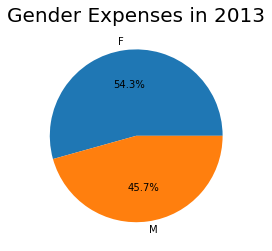

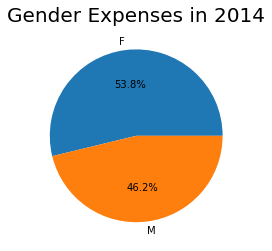

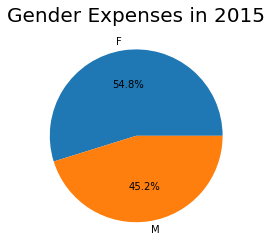

In [502]:
# report2 analyzes Female spending vs Male spending.
# Pie chart would be a nice representatiion for the data. 

# 2013
fig  = plt.figure(figsize=(3,3))
axis = fig.add_axes([0, 0, 1, 1])
axis.set_title('Gender Expenses in 2013', fontsize=20)
axis.pie(gen4.Amount, labels=gen4.index, autopct='%.1f%%')
plt.show()

# 2014: 
fig  = plt.figure(figsize=(3,3))
axis = fig.add_axes([0, 0, 1, 1])
axis.set_title('Gender Expenses in 2014', fontsize=20)
# Sum all quarters for 2014: 
pie_14 = ((df1['Date'] >= datetime(2014, 1, 1)) & (df1['Date'] <= datetime(2014, 12, 31)))
pie_14 = df1[pie_14]
pie_14 = pie_14.groupby(by = ['Gender']).sum()
pie_14
# Plot:
axis.pie(pie_14.Amount, labels=pie_14.index, autopct='%.1f%%')
plt.show()

# 2015: 
fig  = plt.figure(figsize=(3,3))
axis = fig.add_axes([0, 0, 1, 1])
axis.set_title('Gender Expenses in 2015', fontsize=20)
# Sum all quarters for 2015: 
pie_15 = ((df1['Date'] >= datetime(2015, 1, 1)) & (df1['Date'] <= datetime(2015, 12, 31)))
pie_15 = df1[pie_15]
pie_15 = pie_15.groupby(by = ['Gender']).sum()
pie_15
# Plot: 
axis.pie(pie_15.Amount, labels=pie_15.index, autopct='%.1f%%')
plt.show()

## Report 3: TOP3-Expenses-Analysis

#### >>Step1: Create 3 seperate reports for each year: 

In [285]:
# Create exp-type report for 2013: 
exp13 = df1[filter1]
exp13 = exp13.groupby(by = ['Exp Type']).sum().sort_values(by = ['Amount'], ascending = False).head(3)
exp13 = exp13.sort_values(by = ['Amount'], ascending = True).transpose()
exp13['Year'] = 2013
exp13

Exp Type,Fuel,Food,Bills,Year
Amount,113938738,123284967,136165014,2013


In [291]:
# Create exp-type report for 2014: 
exp14 = df1[filter2]
exp14 = exp14.groupby(by = ['Exp Type']).sum().sort_values(by = ['Amount'], ascending = False).head(3)
exp14 = exp14.sort_values(by = ['Amount'], ascending = True).transpose()
exp14['Year'] = 2014
exp14

Exp Type,Fuel,Food,Bills,Year
Amount,481697184,491383057,543741413,2014


In [292]:
# Create exp-type report for 2015: 
exp15 = df1[filter3]
exp15 = exp15.groupby(by = ['Exp Type']).sum().sort_values(by = ['Amount'], ascending = False).head(3)
exp15 = exp15.sort_values(by = ['Amount'], ascending = True).transpose()
exp15['Year'] = 2015
exp15

Exp Type,Fuel,Food,Bills,Year
Amount,193499899,210055985,227166046,2015


#### >>Step2: Combine reports to form report3: 

In [288]:
result3 = [exp13, exp14, exp15]
print('Report-3: TOP3-Expenses-Analysis')
for e in result3:
    display(e) 

Report-3: TOP3-Expenses-Analysis


Exp Type,Fuel,Food,Bills,Year
Amount,113938738,123284967,136165014,2013


Exp Type,Fuel,Food,Bills,Year
Amount,481697184,491383057,543741413,2014


Exp Type,Fuel,Food,Bills,Year
Amount,193499899,210055985,227166046,2015


In [ ]:
# For all 3 years, people spend the most on Bills, Food, and Fuel. 

### Report3 Bar Chart: 

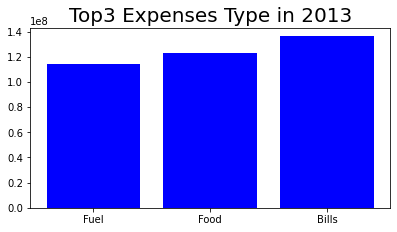

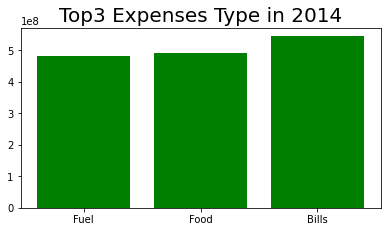

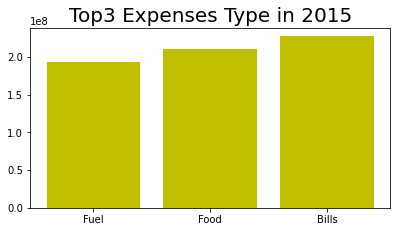

In [529]:
# 2013 top3 exp type: 
bar13 = df1[filter1]
bar13 = bar13.groupby(by = ['Exp Type']).sum().sort_values(by = ['Amount'], ascending = False).head(3)
bar13 = bar13.sort_values(by = ['Amount'], ascending = True)
# 2013 bar chart: 
fig  = plt.figure(figsize=(10,5))
axis = fig.add_axes([0, 0, 0.5, 0.5])
axis.set_title('Top3 Expenses Type in 2013', fontsize=20)
axis.bar(bar13.index, bar13.Amount, color = 'b')
plt.show()

# 2014 top3 exp type: 
bar14 = df1[filter2]
bar14 = bar14.groupby(by = ['Exp Type']).sum().sort_values(by = ['Amount'], ascending = False).head(3)
bar14 = bar14.sort_values(by = ['Amount'], ascending = True)
# 2014 bar chart: 
fig  = plt.figure(figsize=(10,5))
axis = fig.add_axes([0, 0, 0.5, 0.5])
axis.set_title('Top3 Expenses Type in 2014', fontsize=20)
axis.bar(bar14.index, bar14.Amount, color = 'g')
plt.show()

# 2015 top3 exp type: 
bar15 = df1[filter3]
bar15 = bar15.groupby(by = ['Exp Type']).sum().sort_values(by = ['Amount'], ascending = False).head(3)
bar15 = bar15.sort_values(by = ['Amount'], ascending = True)
# 2014 bar chart: 
fig  = plt.figure(figsize=(10,5))
axis = fig.add_axes([0, 0, 0.5, 0.5])
axis.set_title('Top3 Expenses Type in 2015', fontsize=20)
axis.bar(bar15.index, bar15.Amount, color = 'y')
plt.show()

## Report4: Fraud Report

#### Define Business Rules for potential fraud transactions:  
1. Assume that potential frauds are more likely to happen in the top 10 "Richest" cities in India. 
2. "Gold" and "Platinum" cards holders normally have a more aggresive spending habbit than "Silver" card holders;
   therefore, I made an assumption that "Silver" card holders with a large spending amount might be a potential fraud. 
3. Most of the credit cards fraud transactions occur online, so that its more likely that the Exp Type is "Entertainment".    
4. From report2, Female spend more than Male in all 3 years, I assume that a Male cardholder with a large spending amount 
   might be a potential fraud transaction. 
5. The average transaction amount is 156411 and the max(amount) is 998077, we assume 250000 to be the "Large Amount".    

In [304]:
# All Exp Types: 
df['Exp Type'].drop_duplicates()

0                Bills
468               Food
760      Entertainment
762            Grocery
763               Fuel
25313           Travel
Name: Exp Type, dtype: object

In [303]:
# Average transaction amount. 
df['Amount'].mean()

156411.5374251497

In [305]:
df['Amount'].max()

998077

In [330]:
# From: https://www.indiatimes.com/trending/social-relevance/top-10-richest-cities-in-india-2021-552132.html?picid=2181871
# We get the top10 list of the "Richest" Cities in India: 
cities = ['Greater Mumbai', 'Delhi', 'Kolkata', 'Bengaluru', 'Chennai','Hyderabad','Pune','Ahmedabad','Surat','Visakhapatnam']

In [354]:
# View all cities in India
pd.set_option('display.max_rows', 20)
print(df1['City'].drop_duplicates())

0                 Delhi
1        Greater Mumbai
2             Bengaluru
23            Ahmedabad
13996          Markapur
13997            Mavoor
13998            Sillod
13999          Nainital
14000          Laharpur
14001        Shenkottai
              ...      
18571          Mahidpur
18632           Savanur
18754            Jaipur
18822           Vellore
18845            Bagaha
18953     Changanassery
19089             Tirur
19362      Srikalahasti
19456        Wanaparthy
19538           Fazilka
Name: City, Length: 986, dtype: object


In [329]:
# Make sure the top 10 cities are in the dataframe(repeat for all 10 cities):
substring = 'visak'
df1[df1.apply(lambda row: row.astype(str).str.contains(substring, case = False).any(), axis = 1)]

,City,Date,Card Type,Exp Type,Gender,Amount
14257,Visakhapatnam,2013-11-25,Platinum,Entertainment,M,27225
14462,Visakhapatnam,2014-12-28,Signature,Grocery,M,112931
14486,Visakhapatnam,2014-06-23,Platinum,Bills,F,233023
15496,Visakhapatnam,2013-12-08,Silver,Grocery,M,288171
15838,Visakhapatnam,2014-06-27,Platinum,Food,F,182336
18344,Visakhapatnam,2013-10-19,Gold,Fuel,F,279623
19648,Visakhapatnam,2014-08-21,Platinum,Fuel,M,276571


### Fraud Report: 

In [378]:
# Apply all 5 filters to generate the potential fraud report: 
fraud_report = df1[df1.City.isin(cities) & (df1['Card Type'] == 'Silver') & 
    (df1['Exp Type'] == 'Entertainment') & 
    (df1.Gender=='M') & (df1.Amount > 250000)]
fraud_report

,City,Date,Card Type,Exp Type,Gender,Amount
1794,Delhi,2015-01-13,Silver,Entertainment,M,254753
2876,Greater Mumbai,2013-11-13,Silver,Entertainment,M,260146
3007,Ahmedabad,2014-05-22,Silver,Entertainment,M,280442
3127,Greater Mumbai,2015-02-12,Silver,Entertainment,M,297742
3331,Greater Mumbai,2014-01-29,Silver,Entertainment,M,295591
3538,Greater Mumbai,2013-10-28,Silver,Entertainment,M,273218
3672,Greater Mumbai,2015-04-03,Silver,Entertainment,M,265602
4104,Ahmedabad,2013-10-04,Silver,Entertainment,M,296021
4722,Bengaluru,2014-03-29,Silver,Entertainment,M,279465
4808,Ahmedabad,2014-07-29,Silver,Entertainment,M,270301


In [379]:
# There are 69 potential fraud transactions to be further reviewed.